<a href="https://colab.research.google.com/github/DanielaOrtGon/AI_AugDec2024_1999960/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Activity 7: Convolutional Neural Network**

* Student's name: Daniela Ortega González
* ID: 1999960
* Group: 002
* Class: Thursday, N4-N6

### **Load libraries**

In [1]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import datasets, layers, models
from keras.datasets import mnist
from random import randint

### **Load data**

In [2]:
# Load Dataset (MNIST)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### **Data preprocessing**

In [3]:
# Normalize the data (values between 0 and 1)
train_images, test_images = train_images / 255.0, test_images / 255.0

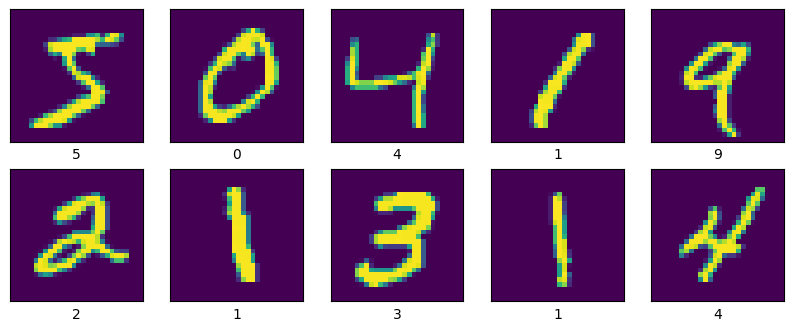

In [4]:
# Verify the Dataset
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

### **Model selection and training**


In [5]:
# Structure of the CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) #Softmax on output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compile the model with chosen loss function, optimizer, and evaluation metric (accuracy)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8, batch_size=100,
                    validation_data=(test_images, test_labels))

Epoch 1/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.8502 - loss: 0.4972 - val_accuracy: 0.9821 - val_loss: 0.0585
Epoch 2/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 87ms/step - accuracy: 0.9828 - loss: 0.0582 - val_accuracy: 0.9807 - val_loss: 0.0594
Epoch 3/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 53s 88ms/step - accuracy: 0.9868 - loss: 0.0407 - val_accuracy: 0.9901 - val_loss: 0.0320
Epoch 4/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 86s 95ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9910 - val_loss: 0.0296
Epoch 5/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 75s 84ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.9901 - val_loss: 0.0306
Epoch 6/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.9949 - loss: 0.0168 - val_accuracy: 0.9926 - val_loss: 0.0244
Epoch 7/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 52s 87ms/step - accuracy: 0.9953 - loss: 0.0145 - val_accuracy: 0.9916 - val_loss: 0.0273
Epoch 8/8
600/600 ━━━━━━━━━━━━━━━━━━━━ 51s 84ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accu

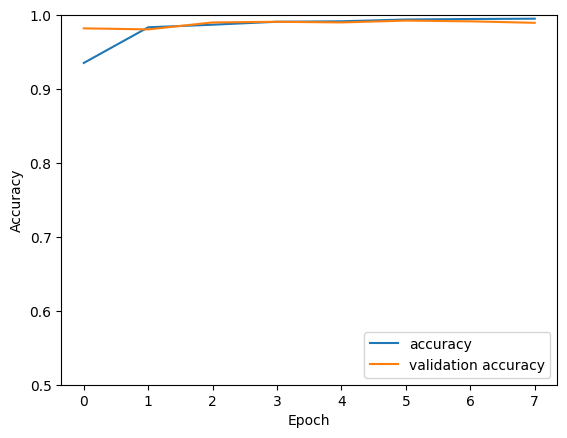

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### **Model testing**

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 613ms/step - accuracy: 0.9871 - loss: 0.0416
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predict: 6
Real: 6


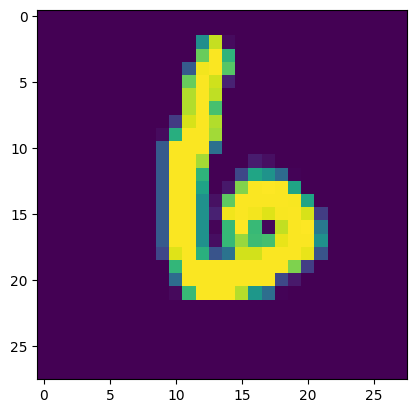

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict: 8
Real: 8


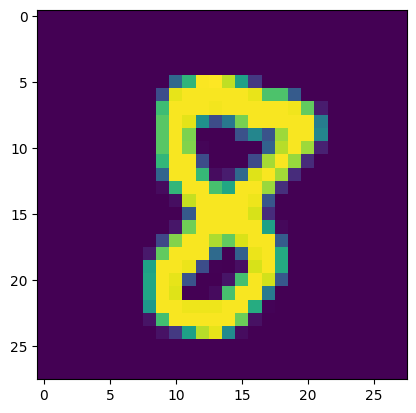

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predict: 8
Real: 8


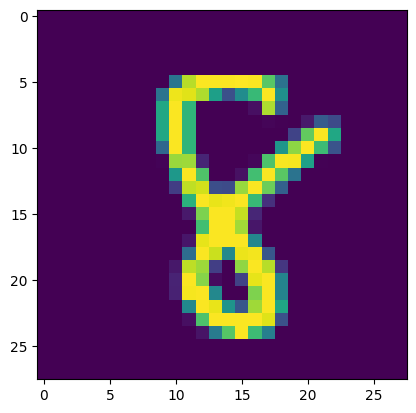

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predict: 6
Real: 6


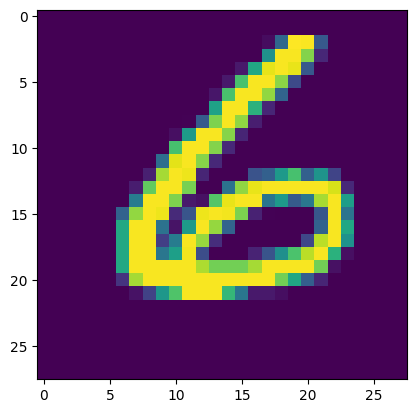

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict: 4
Real: 4


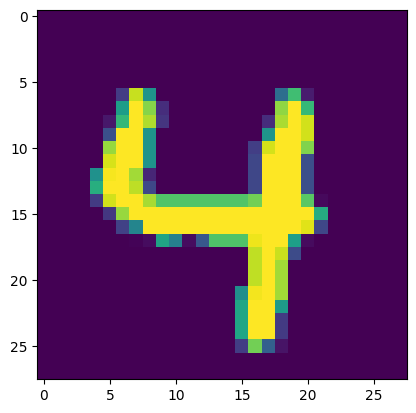

In [9]:
# Evaluate the model's performance on the test data
test_loss, test_acc = model.evaluate(test_images,  test_labels, steps=5)

# Make 5 Predictions
for x in range(5):

    # Random index in dataset
    i = randint(0, len(test_images))
    # Prediction
    predict = np.argmax(model.predict(test_images[i:i+1]))
    # Values and images
    print("Predict:", predict)
    print("Real:", test_labels[i])
    plt.imshow(test_images[i])
    plt.show()

### **Questions**



### *   How many epochs did you use to improve the performance of the model compared with the feedforward neural network of assignment 6?

I changed from 10 epochs to 8 for this assignment, and i also changed the batch size from 32 to 100.

### *   Did you get a better performance on this assignment or on assignment 6? Why?

The performance is definitely better with the CNN model than with the FFNN model, the accuracy went from 0.9720 to 0.9871, even tho it can be seen as not such a big change, because it only incremented 0.0151, this minimal increase is due to the fact that a CNN is better than a FFNN for this assignment, this is because CNNs are designed to detect more patterns like edges and shapes, which makes them less sensitive to variations in the images, in this case, the variations form the different handwriting styles. Also, the CNN uses convolutional layers to extract features and reduce the number of parameters, which makes it more efficient and effective.


